In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd

dat = pd.read_csv('drive_used_labeled.csv')

train, test = train_test_split(dat, train_size=60, random_state=501)

In [2]:
len(train)

60

In [3]:
len(test)

175

In [4]:
X_train = train.iloc[:, 3:11]
y_train = train.iloc[:,0]
X_test = test.iloc[:, 3:11]
y_test = test.iloc[:,0]

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
  {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1], 'kernel': ['rbf']},
  {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1], 'kernel': ['sigmoid']},
 ]
svc = SVC()
search = GridSearchCV(svc, param_grid, cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                          'kernel': ['sigmoid']}])

In [6]:
search.cv_results_

{'mean_fit_time': array([0.00179892, 0.00099487, 0.00160298, 0.00160646, 0.00140767,
        0.00160751, 0.00139651, 0.00099425, 0.00159822, 0.00140214,
        0.00160069, 0.00119944, 0.0014009 , 0.00120206, 0.00159988,
        0.0014154 , 0.001402  , 0.00120625, 0.00160093, 0.00139756,
        0.00139484]),
 'std_fit_time': array([7.50128376e-04, 1.19375114e-05, 4.90558903e-04, 4.92361163e-04,
        4.95130044e-04, 4.98122331e-04, 4.92491665e-04, 8.73978904e-06,
        4.89399410e-04, 4.90964283e-04, 4.91062741e-04, 4.01046652e-04,
        4.89240301e-04, 3.91308923e-04, 4.90544720e-04, 4.93659670e-04,
        4.88454320e-04, 4.01157113e-04, 4.90428939e-04, 4.86612107e-04,
        4.82719983e-04]),
 'mean_score_time': array([0.00120888, 0.0009985 , 0.00079217, 0.00059752, 0.00099244,
        0.00099292, 0.00079532, 0.00100574, 0.0010076 , 0.00099802,
        0.00120497, 0.00099483, 0.0009995 , 0.00099444, 0.00100017,
        0.0007843 , 0.00080919, 0.0011879 , 0.00099916, 0.000801

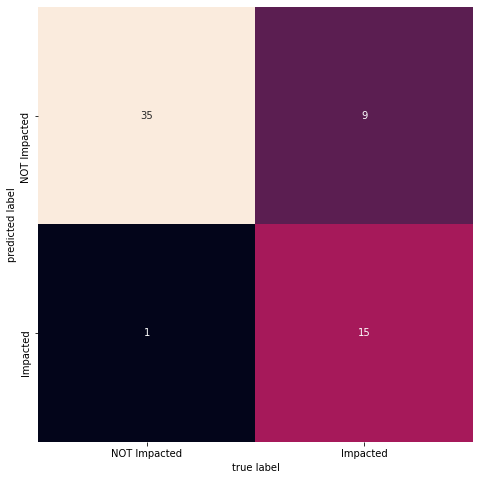

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_train)
mat = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['NOT Impacted', 'Impacted'],
            yticklabels=['NOT Impacted', 'Impacted'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('u_svm_linear_test.png')

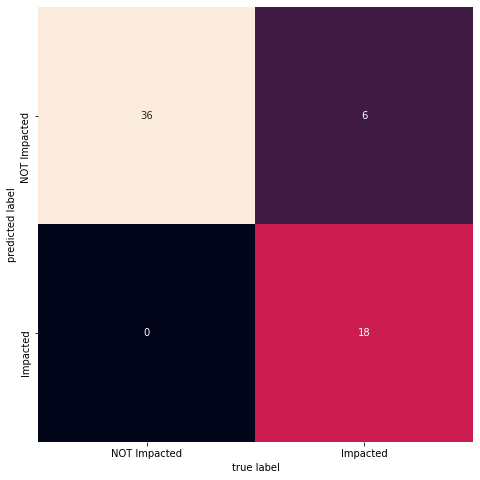

In [16]:
svc_radial = SVC(kernel='rbf', C=1)
svc_radial.fit(X_train, y_train)
y_pred = svc_radial.predict(X_train)
mat = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['NOT Impacted', 'Impacted'],
            yticklabels=['NOT Impacted', 'Impacted'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('u_svm_radial_test.png')

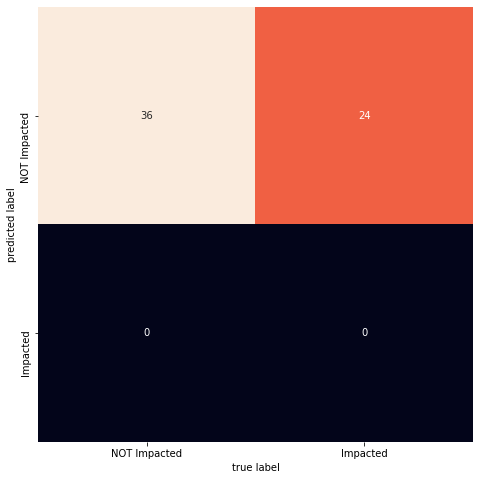

In [15]:
svc_sigmoid = SVC(kernel='sigmoid', C=0.5)
svc_sigmoid.fit(X_train, y_train)
y_pred = svc_sigmoid.predict(X_train)
mat = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['NOT Impacted', 'Impacted'],
            yticklabels=['NOT Impacted', 'Impacted'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('u_svm_sigmoid_test.png')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = search.predict(X_train)
confusion_matrix(y_train, y_pred)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
y_pred_test = search.predict(X_test)
test

In [ ]:
all_0 = test[y_pred_test == 0]
all_0 = all_0.iloc[:, 2:12]

all_0 = all_0.transpose()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
all_0.plot(alpha=0.5)
plt.legend("")
plt.xticks(rotation=90)
plt.ylabel("Relative second-hand price")
plt.title("Second-hand Price of Drives with CHIA_IMPACT=0")
plt.savefig('sc_chia0.png', dpi=300)
plt.show()

In [ ]:
all_1 = test[y_pred_test == 1]
all_1 = all_1.iloc[:, 2:12]
all_1 = all_1.transpose()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
all_1.plot(alpha=0.5)
plt.legend("")
plt.xticks(rotation=90)
plt.ylabel("Relative second-hand price")
plt.title("Second-hand Price of Drives with CHIA_IMPACT=1")
plt.savefig('sc_chia1.png', dpi=300)
plt.show()